In [ ]:
#import any libraries we need
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

Mounted at /content/drive


In [ ]:
#reads in the dataset
data = pd.read_csv("drive/My Drive/cleaned_tyler_df(kagglekworb.csv")
#prints first five rows of the dataset
data.head()

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,time_signature,featured_artists,type,duration,year,month,day_of_the_week,featured_artists_count,Streams,Daily
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,82,True,0.554,0.498,...,4,NaN,Studio Album,190,2019,May,Friday,0,1066078560,906587.0
1,"Tyler, The Creator",Thought I Was Dead (feat. ScHoolboy Q & Santig...,2aYHxnMF2umAavtgBvmkY1,CHROMAKOPIA,0U28P0QVB1QRxpqp5IHOlH,2024-10-28,81,True,0.770,0.859,...,4,"ScHoolboy Q, Santigold",Studio Album,207,2024,October,Monday,2,28601909,1718253.0
2,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,4,Kali Uchis,Studio Album,180,2017,July,Friday,1,1935907943,2720762.0
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,83,True,0.596,0.575,...,3,NaN,Single,127,2020,January,Saturday,0,632344203,1000950.0
4,"Tyler, The Creator",Noid,1YdtGoSYDvVQKoUqSDXX41,CHROMAKOPIA,0U28P0QVB1QRxpqp5IHOlH,2024-10-28,82,True,0.380,0.784,...,4,NaN,Studio Album,284,2024,October,Monday,0,55805969,1940081.0


In [ ]:
#displays summary statistics for each feature in the dataset
data.describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,year,featured_artists_count,Streams,Daily
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,1.530000e+02
mean,54.313725,0.564170,0.633850,-7.769275,0.208553,0.189759,0.156909,0.280015,0.423531,111.671765,3.908497,223.071895,2016.130719,0.549020,9.380941e+07,1.921913e+05
std,15.994847,0.138687,0.158517,2.445222,0.153599,0.217728,0.302668,0.213742,0.208755,33.411831,0.463957,91.451605,4.128994,0.986362,2.083935e+08,5.031861e+05
min,26.000000,0.216000,0.202000,-16.077000,0.026500,0.000058,0.000000,0.047600,0.038300,40.319000,1.000000,36.000000,2011.000000,0.000000,1.203120e+05,1.110000e+02
25%,43.000000,0.463000,0.534000,-9.473000,0.060700,0.014900,0.000000,0.115000,0.239000,80.453000,4.000000,174.000000,2013.000000,0.000000,1.505812e+06,2.949000e+03
50%,56.000000,0.559000,0.627000,-7.615000,0.199000,0.103000,0.000131,0.196000,0.418000,108.822000,4.000000,211.000000,2015.000000,0.000000,2.787632e+07,2.612300e+04
75%,65.000000,0.675000,0.759000,-6.022000,0.331000,0.316000,0.080800,0.396000,0.555000,139.948000,4.000000,253.000000,2019.000000,1.000000,9.354318e+07,8.989600e+04
max,89.000000,0.854000,0.998000,-2.320000,0.828000,0.959000,0.947000,0.890000,0.971000,204.082000,5.000000,588.000000,2024.000000,7.000000,1.935908e+09,3.564567e+06


In [ ]:
#define the features and the target variable
features = ['album_name', 'album_id', 'release_date', 'explicit', 'danceability',
            'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence',
            'tempo', 'time_signature', 'featured_artists', 'type',
            'duration', 'month', 'day_of_the_week']
target = 'popularity'

In [ ]:
#gives us the dataset copy with only the features we want to use
data_subset = data[features + [target]].copy()

In [ ]:
#encodes the categorical features
categorical_features = ['album_name', 'release_date', 'key', 'mode',
                        'featured_artists', 'type', 'month', 'day_of_the_week']
label_encoders = {col: LabelEncoder() for col in categorical_features}
for col in categorical_features:
  data_subset[col] = data_subset[col].apply(lambda x: str(x) if not pd.isnull(x) else 'Unknown')
  data_subset[col] = label_encoders[col].fit_transform(data_subset[col].astype(str))

In [ ]:
#separate the target and features into their own subsets
X = data_subset[features]
y = data_subset[target]

In [ ]:
#scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#split and train the testing and training data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [ ]:
#train each classifier machine learning model and make predictions
classifier_models = {
    "Random Forest Classifier": RandomForestClassifier(random_state = 42),
    "Decision Trees Classifier": DecisionTreeClassifier(criterion = 'gini', max_depth = None, random_state = 42),
    "Support Vector Machine": SVC(kernel = 'linear'),
    "Neural Networks": MLPClassifier(hidden_layer_sizes = (100, 50), max_iter = 500),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state = 42),
    "kNN": KNeighborsClassifier(n_neighbors = 3)
}
#check the performance of these models
#the accuracy is very low which makes sense since our target is a numerical value and not a 'class' so classifier models should not work well
classifier_model_performance = {}
for classifier_model_name, classifier_model in classifier_models.items():
  classifier_model.fit(X_train, y_train)
  y_pred = classifier_model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  classifier_model_performance[classifier_model_name] = {"MSE": mse, "R2 Score": r2, "Accuracy": accuracy}
  print(f"{classifier_model_name} Performance:")
  print(f"  Mean Squared Error (MSE): {mse}")
  print(f"  R² Score: {r2}")
  print(f"  Accuracy Score: {accuracy}")
  print("="*40)

Random Forest Classifier Performance:
  Mean Squared Error (MSE): 32.16129032258065
  R² Score: 0.8424703615735125
  Accuracy Score: 0.3225806451612903
Decision Trees Classifier Performance:
  Mean Squared Error (MSE): 49.45161290322581
  R² Score: 0.7577804055087207
  Accuracy Score: 0.25806451612903225
Support Vector Machine Performance:
  Mean Squared Error (MSE): 71.6774193548387
  R² Score: 0.6489158910896136
  Accuracy Score: 0.12903225806451613
Neural Networks Performance:
  Mean Squared Error (MSE): 45.903225806451616
  R² Score: 0.7751608069399281
  Accuracy Score: 0.1935483870967742
Naive Bayes Performance:
  Mean Squared Error (MSE): 118.25806451612904
  R² Score: 0.4207586213926747
  Accuracy Score: 0.0967741935483871
Gradient Boosting Classifier Performance:
  Mean Squared Error (MSE): 240.5483870967742
  R² Score: -0.17823321338647702
  Accuracy Score: 0.06451612903225806
kNN Performance:
  Mean Squared Error (MSE): 70.0
  R² Score: 0.6571320808570933
  Accuracy Score: 0.

In [ ]:
#now train each regressor machine learning models and make predictions
regressor_models = {
    "Random Forest Regressor": RandomForestRegressor(random_state = 42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state = 42),
    "Decision Trees Regressor": DecisionTreeRegressor(random_state = 42),
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression()
}
#print out the performance of each model
#regressor models work much better which lines up with the target feature that we are using
#The top two model that has the best perforamnce is the Random Forest Regressor and the Gradient Boosting Regressor
regressor_model_performance = {}
for regressor_model_name, regressor_model in regressor_models.items():
  regressor_model.fit(X_train, y_train)
  y_pred = regressor_model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  regressor_model_performance[regressor_model_name] = {"MSE": mse, "R2 Score": r2}
  print(f"{regressor_model_name} Performance:")
  print(f"  Mean Squared Error (MSE): {mse}")
  print(f"  R² Score: {r2}")
  print("="*40)

Random Forest Regressor Performance:
  Mean Squared Error (MSE): 15.13770645161291
  R² Score: 0.9258538012619904
Gradient Boosting Regressor Performance:
  Mean Squared Error (MSE): 17.868840408086886
  R² Score: 0.9124763981683223
Decision Trees Regressor Performance:
  Mean Squared Error (MSE): 32.225806451612904
  R² Score: 0.8421543542747633
Linear Regression Performance:
  Mean Squared Error (MSE): 32.61401064962081
  R² Score: 0.8402528861951417
Logistic Regression Performance:
  Mean Squared Error (MSE): 106.2258064516129
  R² Score: 0.47969398260940477


In [ ]:
#print out the feature importance of the Random Forest Regressor model
#shows how important each feature was to the performance of the Random Forest Regressor model
rfreg_importances = regressor_models["Random Forest Regressor"].feature_importances_
rfreg_feature_importance = pd.DataFrame({'RandomForestRegressor Features': features, 'RandomForestRegressor Importance': rfreg_importances}).sort_values(by = 'RandomForestRegressor Importance', ascending = False)
print(rfreg_feature_importance)
print("="*80)
#print out the feature importance of the Gradient Boosting Regressor model
#shows how important each feature was to the performance of the Gradient Boosting Regressor model
gbreg_importances = regressor_models["Gradient Boosting Regressor"].feature_importances_
gbreg_feature_importance = pd.DataFrame({'GradientBoostingRegressor Features': features, 'GradientBoostingRegressor Importance': gbreg_importances}).sort_values(by = 'GradientBoostingRegressor Importance', ascending = False)
print(gbreg_feature_importance)


   RandomForestRegressor Features  RandomForestRegressor Importance
26                          Daily                          0.834231
6                        explicit                          0.070983
25                        Streams                          0.037132
14               instrumentalness                          0.019526
16                        valence                          0.004842
4                        album_id                          0.004155
1                      track_name                          0.003641
3                      album_name                          0.003546
20                           type                          0.002793
2                        track_id                          0.002383
8                          energy                          0.002368
10                       loudness                          0.002259
7                    danceability                          0.001782
13                   acousticness               

In [ ]:
#collect all the numerical features of our dataset
numerical_features = ['explicit', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                    'time_signature', 'duration', 'year', 'Streams', 'Daily']

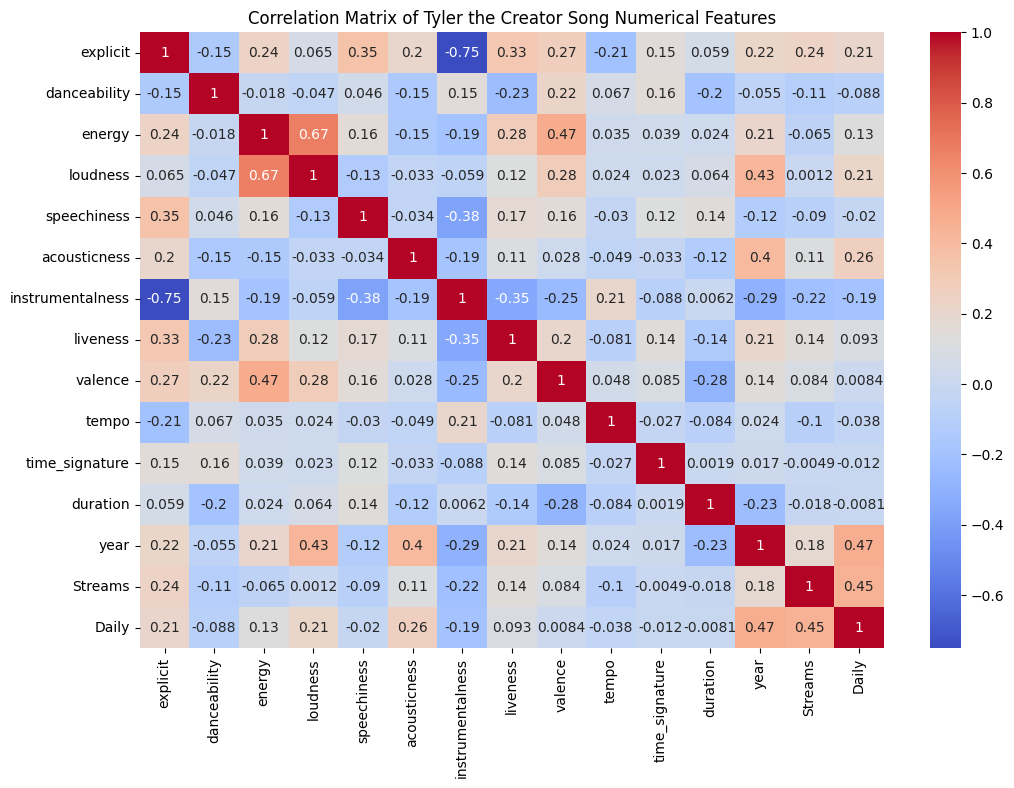

In [ ]:
#display the correlation matrix between the numerical features
#this can show us how related each feature is towards each other
#we want the features with the higher correlation to each other so that it has relevance with our data and will improve our model
corr_matrix = data[numerical_features].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Tyler the Creator Song Numerical Features')
plt.show()

Full Feature Set Performance:
  MSE: 15.142093548387102
  R² Score: 0.9258323127656755

Feature Importances:
Daily: 0.8342313352277864
explicit: 0.07098339389944436
Streams: 0.03713200692100743
instrumentalness: 0.019526160427677675
valence: 0.004842262948345708
album_id: 0.004155036560477507
track_name: 0.0036409267011366336
album_name: 0.003545595712446214
type: 0.00279331384184645
track_id: 0.0023832625974652215
energy: 0.002368279740655651
loudness: 0.002258754359432587
danceability: 0.0017817438904481901
acousticness: 0.00139329052261799
tempo: 0.0012904786044984204
month: 0.0012001296342894288
duration: 0.0011117577310751597
key: 0.0011071121665704466
liveness: 0.001033488035719562
release_date: 0.0009979689103369674
featured_artists: 0.000803486368698684
speechiness: 0.0007776381517419225
day_of_the_week: 0.000276848753491511
year: 0.00024049900668566448
time_signature: 7.212863516561333e-05
mode: 5.310065093866638e-05
artist_name: 0.0

After removing artist_name:
  Remaining fe

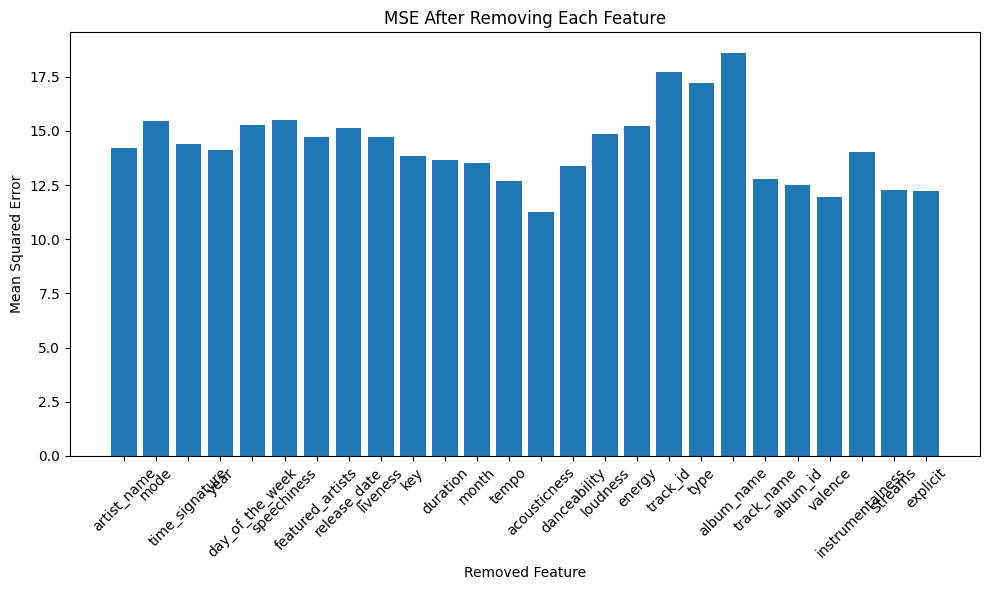

In [ ]:

def evaluate_forest_with_feature_selection(X, y, test_size=0.2, random_state=42):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Full feature set performance
    full_forest = RandomForestRegressor(n_estimators=100, random_state=random_state)
    full_forest.fit(X_train, y_train)
    full_pred = full_forest.predict(X_test)

    print("Full Feature Set Performance:")
    print(f"  MSE: {mean_squared_error(y_test, full_pred)}")
    print(f"  R² Score: {r2_score(y_test, full_pred)}")

    # Feature importance
    feature_importance = full_forest.feature_importances_
    feature_names = X.columns

    # Sort features by importance
    feature_importance_dict = dict(zip(feature_names, feature_importance))
    sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

    print("\nFeature Importances:")
    for feature, importance in sorted_features:
        print(f"{feature}: {importance}")

    # Progressive feature removal
    remaining_features = list(feature_names)
    performance_by_feature_removal = {}

    while len(remaining_features) > 1:
        # Find least important feature
        least_important_feature = sorted(
            [(f, feature_importance_dict[f]) for f in remaining_features],
            key=lambda x: x[1]
        )[0][0]

        # Remove the least important feature
        remaining_features.remove(least_important_feature)

        # Create new dataset with remaining features
        X_reduced = X[remaining_features]
        X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(
            X_reduced, y, test_size=test_size, random_state=random_state
        )

        # Train and evaluate reduced forest
        reduced_forest = RandomForestRegressor(n_estimators=100, random_state=random_state)
        reduced_forest.fit(X_train_reduced, y_train)
        reduced_pred = reduced_forest.predict(X_test_reduced)

        # Store performance
        mse = mean_squared_error(y_test, reduced_pred)
        r2 = r2_score(y_test, reduced_pred)
        performance_by_feature_removal[least_important_feature] = {
            "Removed Feature": least_important_feature,
            "Remaining Features": remaining_features.copy(),
            "MSE": mse,
            "R² Score": r2
        }

        print(f"\nAfter removing {least_important_feature}:")
        print(f"  Remaining features: {remaining_features}")
        print(f"  MSE: {mse}")
        print(f"  R² Score: {r2}")

    return performance_by_feature_removal

# Usage
performance_results = evaluate_forest_with_feature_selection(X, y)

# Visualize results
import matplotlib.pyplot as plt

# Create a bar plot of MSE for each feature removal
plt.figure(figsize=(10, 6))
removed_features = list(performance_results.keys())
mse_values = [results['MSE'] for results in performance_results.values()]

plt.bar(removed_features, mse_values)
plt.title('MSE After Removing Each Feature')
plt.xlabel('Removed Feature')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()